In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## PART 1: Data Understanding (Exploratory Analysis)

In [16]:
df=pd.read_csv(r"C:\Users\HP\Downloads\diabetes_data.csv")

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [18]:
df.shape

(768, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               728 non-null    float64
 1   Glucose                   722 non-null    float64
 2   BloodPressure             735 non-null    float64
 3   SkinThickness             726 non-null    float64
 4   Insulin                   735 non-null    float64
 5   BMI                       729 non-null    float64
 6   DiabetesPedigreeFunction  734 non-null    float64
 7   Age                       735 non-null    float64
 8   Outcome                   739 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [20]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,722.000000,735.000000,726.000000,735.000000,729.000000,734.000000,735.000000,739.000000
mean,3.912088,120.671745,68.927891,20.632231,80.268027,32.028807,0.467578,33.308844,0.341001
std,3.382204,31.982858,19.590744,16.012616,116.198612,7.904681,0.325979,11.727195,0.474367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.238250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,130.000000,36.600000,0.622750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df.isna().sum()

Pregnancies                 40
Glucose                     46
BloodPressure               33
SkinThickness               42
Insulin                     33
BMI                         39
DiabetesPedigreeFunction    34
Age                         33
Outcome                     29
dtype: int64

In [22]:
cols=df.columns

In [23]:
len(df.columns)

9

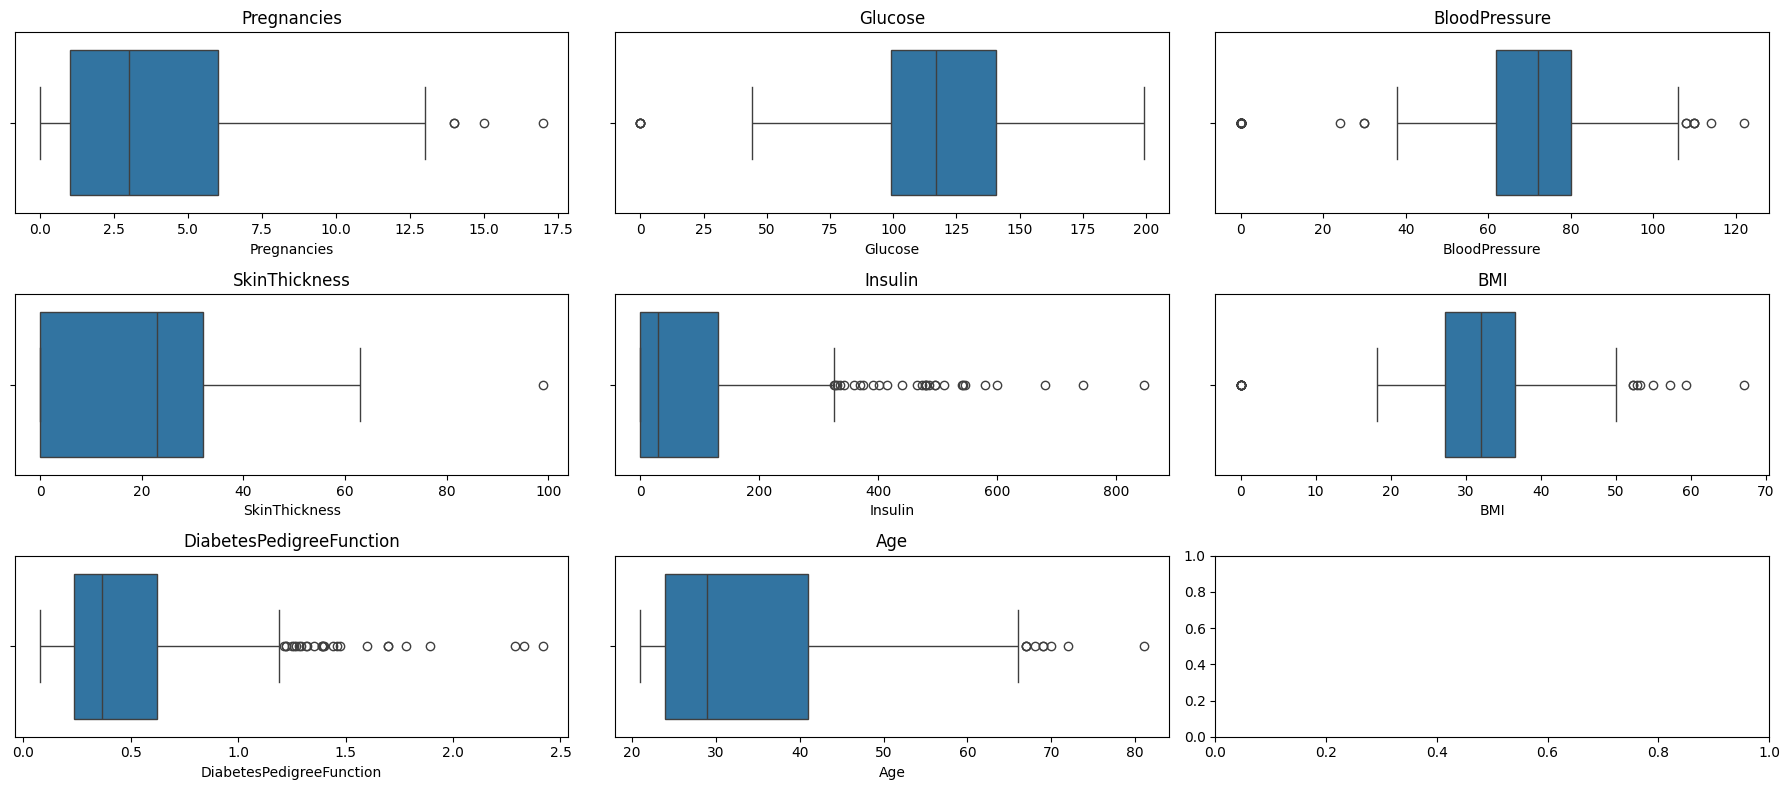

In [11]:
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)-1):
    sns.boxplot(data=df,x=cols[i],ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
plt.tight_layout()

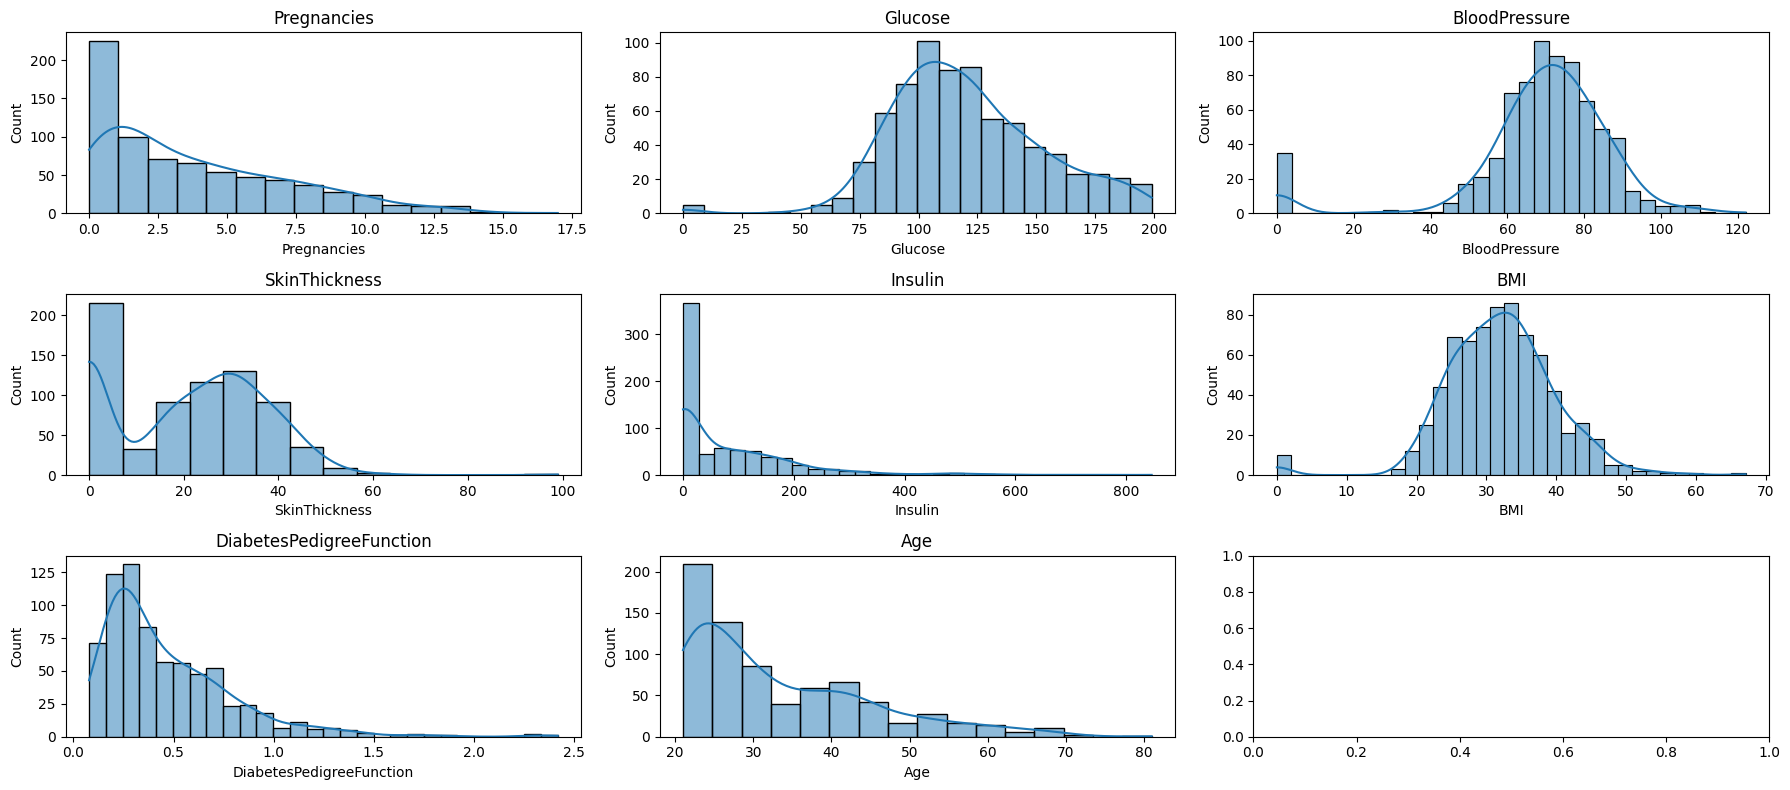

In [11]:
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)-1):
    sns.histplot(data=df,x=cols[i],kde=True,ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
plt.tight_layout()

## PART 2: Missing Value Imputation (Mean, Median, Mode)

In [24]:
df.isna().sum()

Pregnancies                 40
Glucose                     46
BloodPressure               33
SkinThickness               42
Insulin                     33
BMI                         39
DiabetesPedigreeFunction    34
Age                         33
Outcome                     29
dtype: int64

In [25]:
df.Pregnancies.fillna(df.Pregnancies.mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12824\2047566360.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Pregnancies.fillna(df.Pregnancies.mode()[0],inplace=True)


In [26]:
# Glucose value should not be 0 for all humans replacing with nan
df['Glucose']=df['Glucose'].replace(0,np.nan)

In [27]:
df['Glucose'].sort_values(ascending=True)

62     44.0
680    56.0
537    57.0
146    57.0
352    61.0
       ... 
697     NaN
715     NaN
734     NaN
745     NaN
747     NaN
Name: Glucose, Length: 768, dtype: float64

In [28]:
# choosing median to fill nan values to avoid skew
df['Glucose']=df['Glucose'].fillna(df['Glucose'].median())

In [29]:
#df['BloodPressure'].sort_values(ascending=True)
#bloodpressure cannot be a 0
df['BloodPressure']=df['BloodPressure'].replace(0,np.nan)

In [30]:
#filling nan values with median
df['BloodPressure']=df['BloodPressure'].fillna(df['BloodPressure'].median())

In [19]:
#df['SkinThickness'].sort_values(ascending=True)
#skinthickness also cannot be 0
df['SkinThickness']=df['SkinThickness'].replace(0,np.nan)

In [31]:
df['SkinThickness']=df['SkinThickness'].fillna(df['SkinThickness'].median())

In [21]:
df['Insulin']=df['Insulin'].replace(0,np.nan)

In [32]:
df['Insulin']=df['Insulin'].fillna(df['Insulin'].median())

In [33]:
#df['BMI'].sort_values(ascending=True)
#BMI value cannot be 0 
df['BMI']=df['BMI'].replace(0,np.nan)
df['BMI']=df['BMI'].fillna(df['BMI'].median())

In [34]:
#df['DiabetesPedigreeFunction'].sort_values(ascending=True)
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction'].fillna(df['DiabetesPedigreeFunction'].median())

In [35]:
#df['Age'].sort_values(ascending=True)
df['Age']=df['Age'].fillna(df['Age'].median())

In [36]:
df['Outcome'].isna().sum()

29

In [37]:
# Outcome is a target variable
df = df.dropna(subset=['Outcome'])

In [38]:
df.Outcome.isna().sum()

0

## PART 3: Visualizing Before & After Imputation

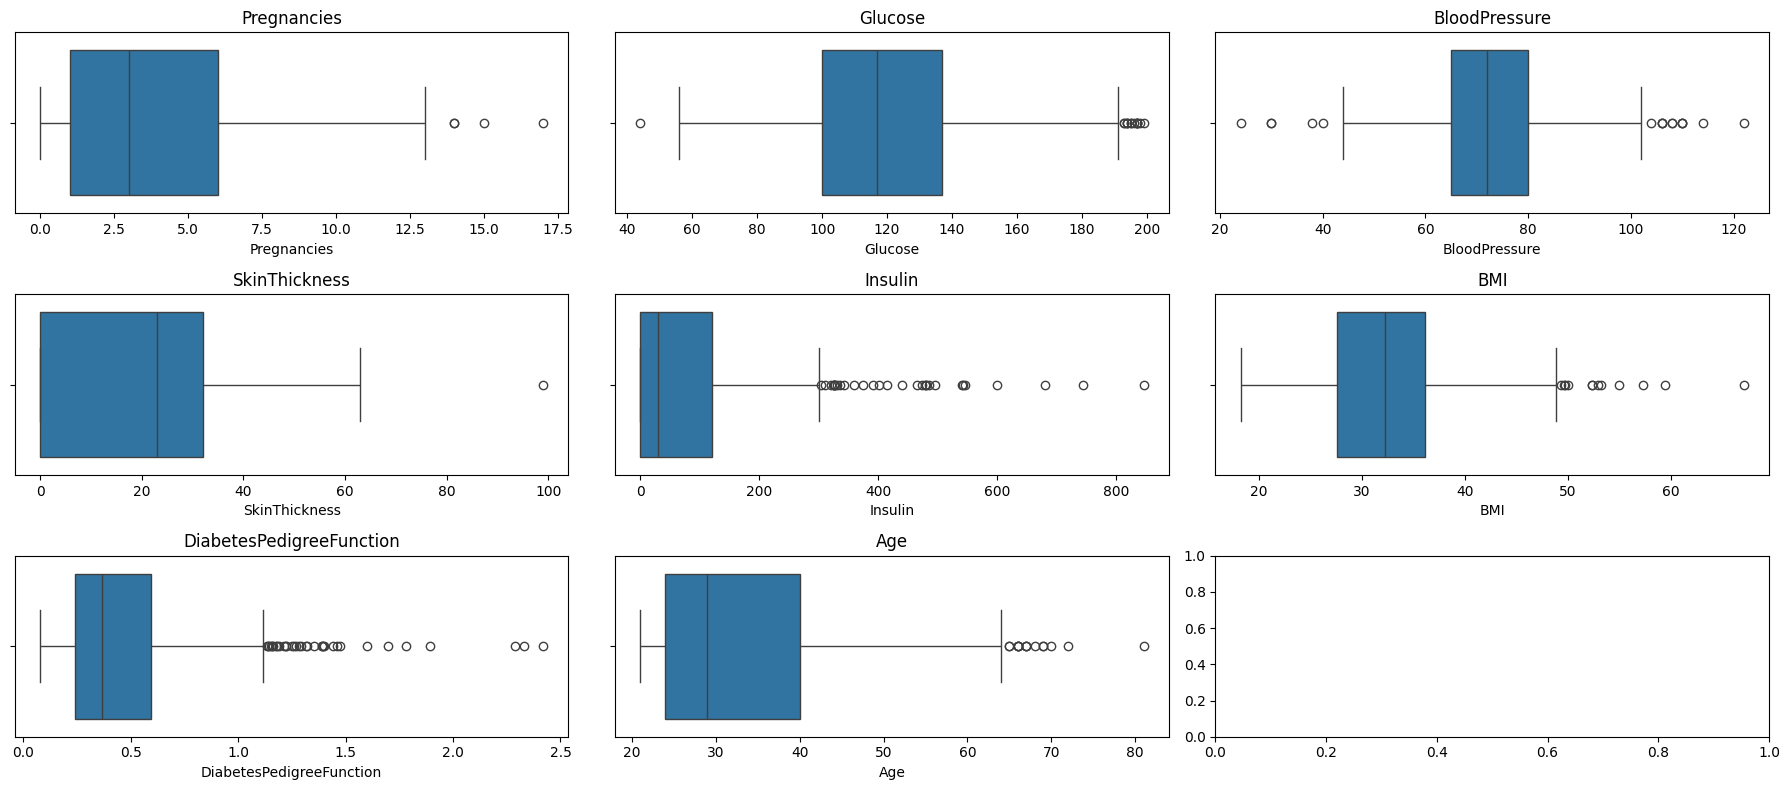

In [39]:
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)-1):
    sns.boxplot(data=df,x=cols[i],ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
plt.tight_layout()

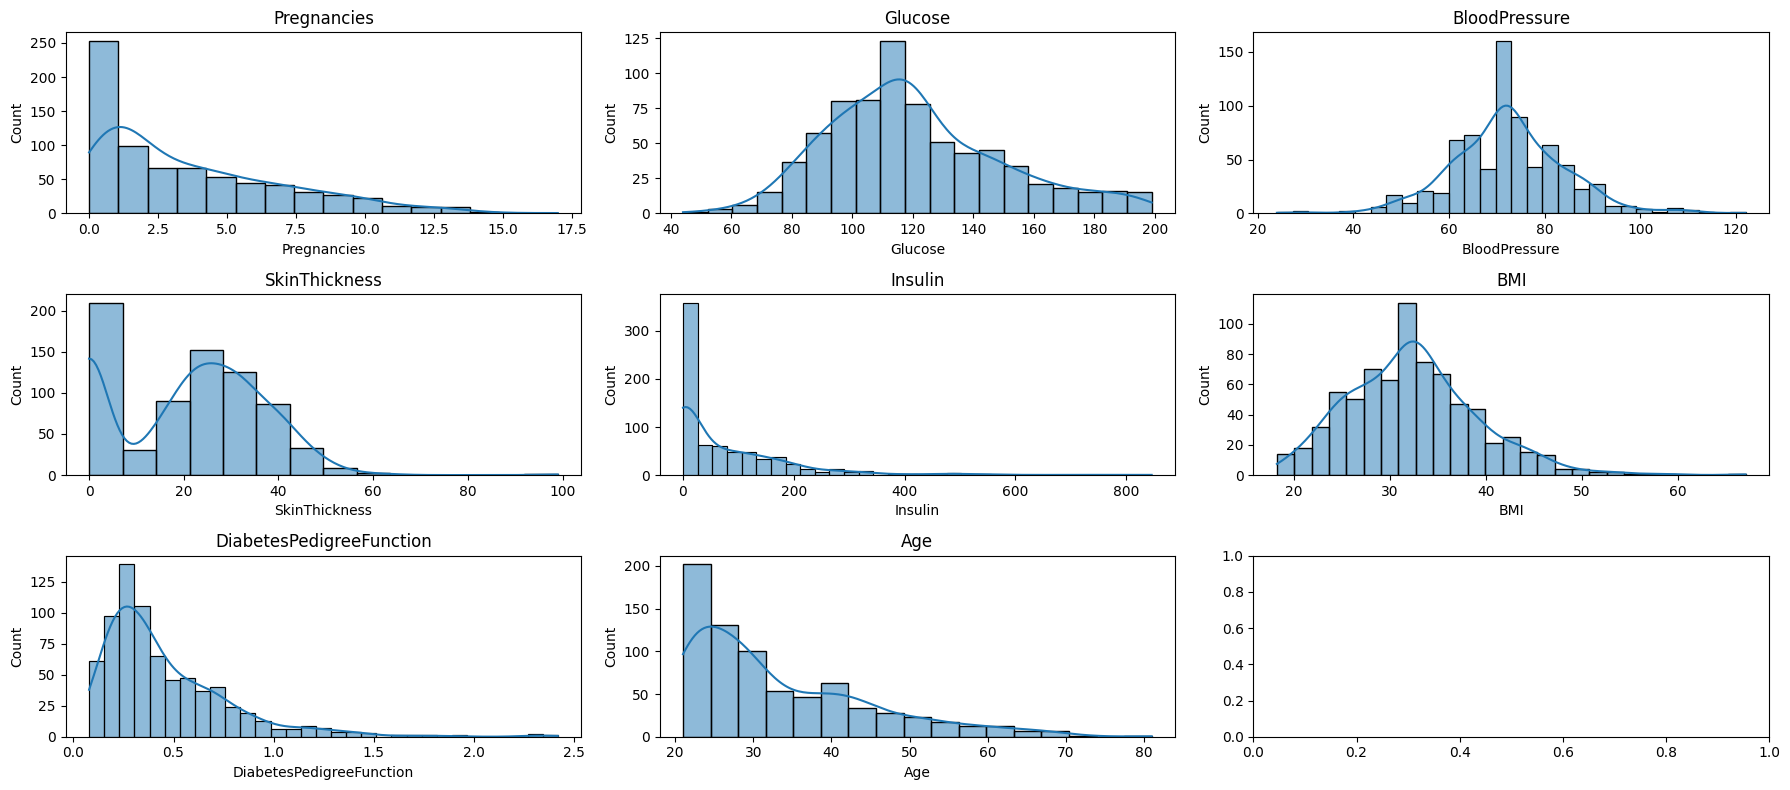

In [40]:
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)-1):
    sns.histplot(data=df,x=cols[i],kde=True,ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
plt.tight_layout()

- **Observations :**
  - There was a slight change in the mean value for all the columns after the data imputation.
  - after handling nan values mean value is slightly increased.
  - after the imputation the distribution of the data changed observed by kde curve.
  - the post imputation distribution appears smoother because missing values are replaced with real numerical values.

## PART 4: Data Scaling

- Standardscaler

In [47]:
from sklearn.preprocessing import StandardScaler

In [49]:
ss=StandardScaler().set_output(transform='pandas')
ss

StandardScaler()

In [53]:
ss_transformed_df=ss.fit_transform(df_new)

In [54]:
ss_transformed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.668949,0.942502,-0.031501,0.917745,-0.678770,0.179607,0.535069,1.456323
1,-0.820964,-1.226986,-0.535737,0.533015,-0.678770,-0.026518,-0.335690,-0.188086
2,1.264914,2.147774,-0.703816,-1.326508,-0.678770,-1.336885,0.677040,-0.101539
3,-0.820964,-1.089241,-0.535737,0.148286,0.168896,-0.630170,-0.916195,-1.053565
4,-1.118947,0.563703,-2.720764,0.917745,0.836208,1.578314,5.775395,-0.014991


- MinMaxScaler

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
mms=MinMaxScaler().set_output(transform='pandas')
mms

MinMaxScaler()

In [60]:
mms_transformed_df=mms.fit_transform(df_new)

In [61]:
mms_transformed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.353535,0.000000,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.292929,0.000000,0.286299,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.000000,0.000000,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.232323,0.111111,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.353535,0.198582,0.509202,0.943638,0.200000


- Robustscaler

In [62]:
from sklearn.preprocessing import RobustScaler

In [63]:
rbs=RobustScaler().set_output(transform='pandas')
rbs

RobustScaler()

In [64]:
rbs_transformed_df=rbs.fit_transform(df_new)
rbs_transformed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.837838,0.000000,0.37500,-0.241667,0.164706,0.735795,1.3125
1,-0.4,-0.864865,-0.400000,0.18750,-0.241667,0.000000,-0.048295,0.1250
2,1.0,1.783784,-0.533333,-0.71875,-0.241667,-1.047059,0.863636,0.1875
3,-0.4,-0.756757,-0.400000,0.00000,0.541667,-0.482353,-0.571023,-0.5000
4,-0.6,0.540541,-2.133333,0.37500,1.158333,1.282353,5.454545,0.2500


In [51]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,32.2,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,1.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,32.2,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [43]:
df_new=df.drop('Outcome',axis=1)

In [46]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,32.2,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,1.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


## PART 5: Visualizing Before & After Scaling

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 739 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               739 non-null    float64
 1   Glucose                   739 non-null    float64
 2   BloodPressure             739 non-null    float64
 3   SkinThickness             739 non-null    float64
 4   Insulin                   739 non-null    float64
 5   BMI                       739 non-null    float64
 6   DiabetesPedigreeFunction  739 non-null    float64
 7   Age                       739 non-null    float64
 8   Outcome                   739 non-null    float64
dtypes: float64(9)
memory usage: 57.7 KB


In [86]:
cols=df.columns

In [88]:
cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

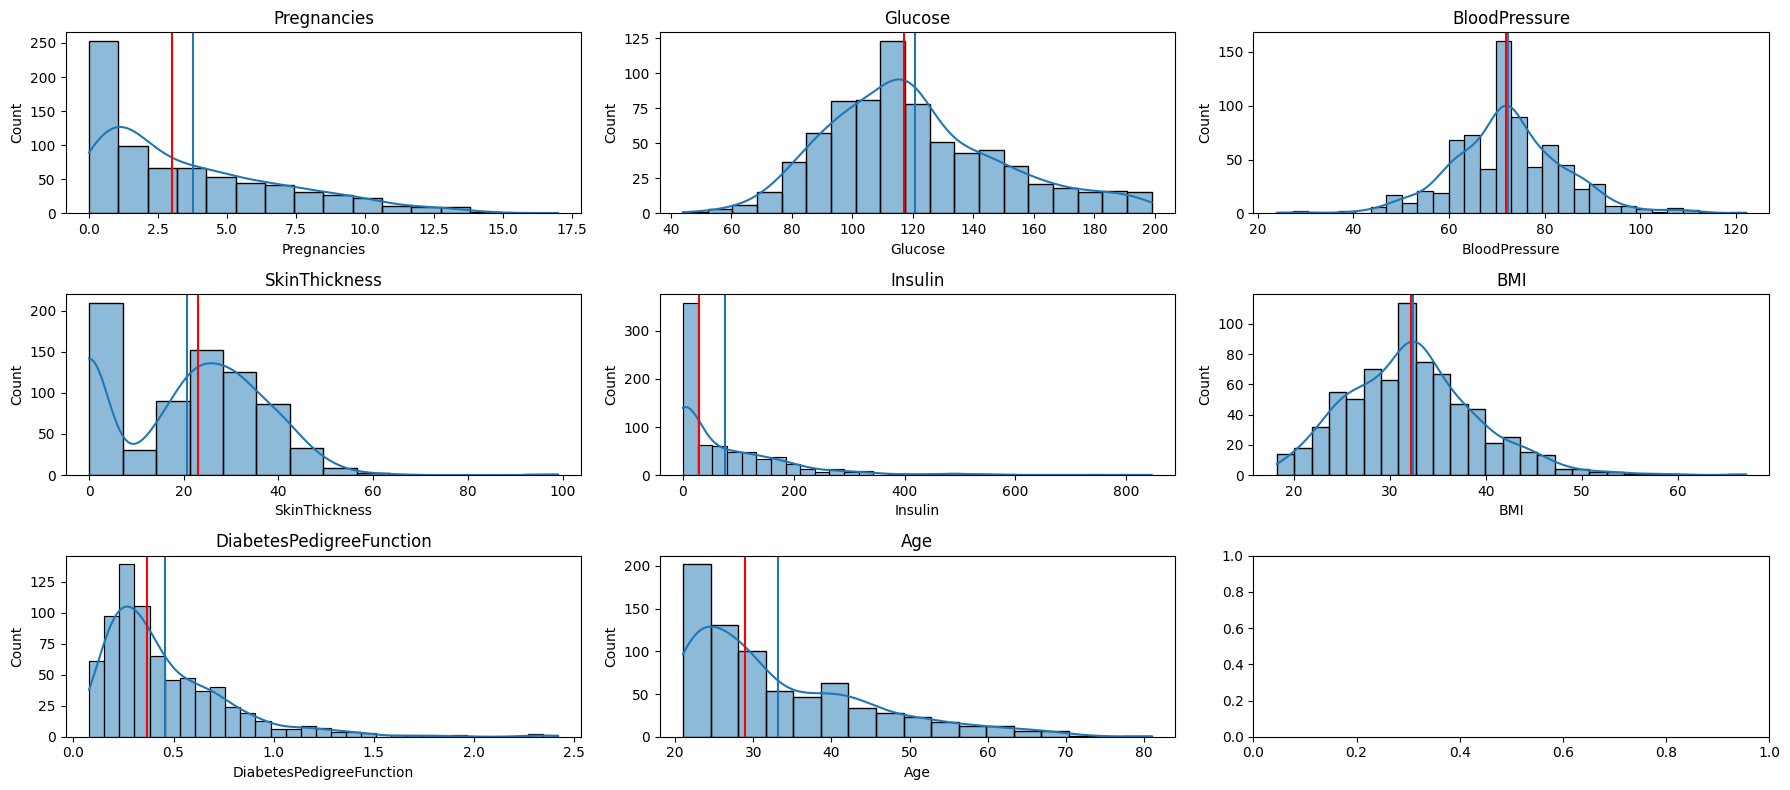

In [99]:
#Before Scaling
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)-1):
    sns.histplot(data=df,x=cols[i],kde=True,ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
    mean_v=df[cols[i]].mean()
    median_v=df[cols[i]].median()
    ax.flatten()[i].axvline(median_v,color='red')
    ax.flatten()[i].axvline(mean_v)

plt.tight_layout()

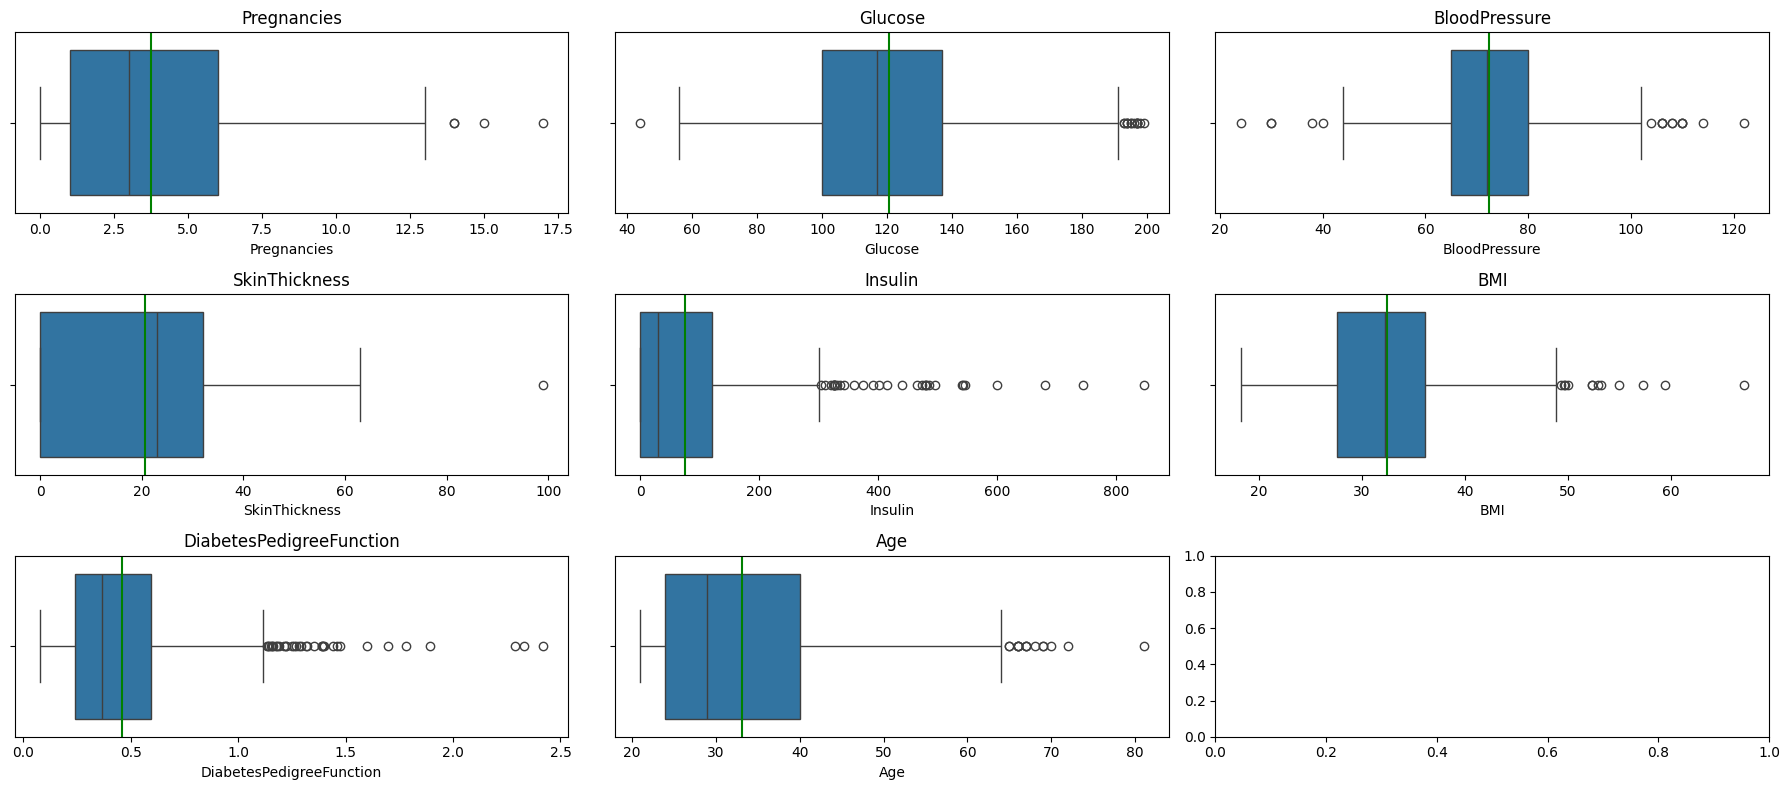

In [103]:
#Before Scaling
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)-1):
    sns.boxplot(data=df,x=cols[i],ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
    mean_v=df[cols[i]].mean()
    ax.flatten()[i].axvline(mean_v,color='green')
plt.tight_layout()

In [117]:
cols=ss_transformed_df.columns

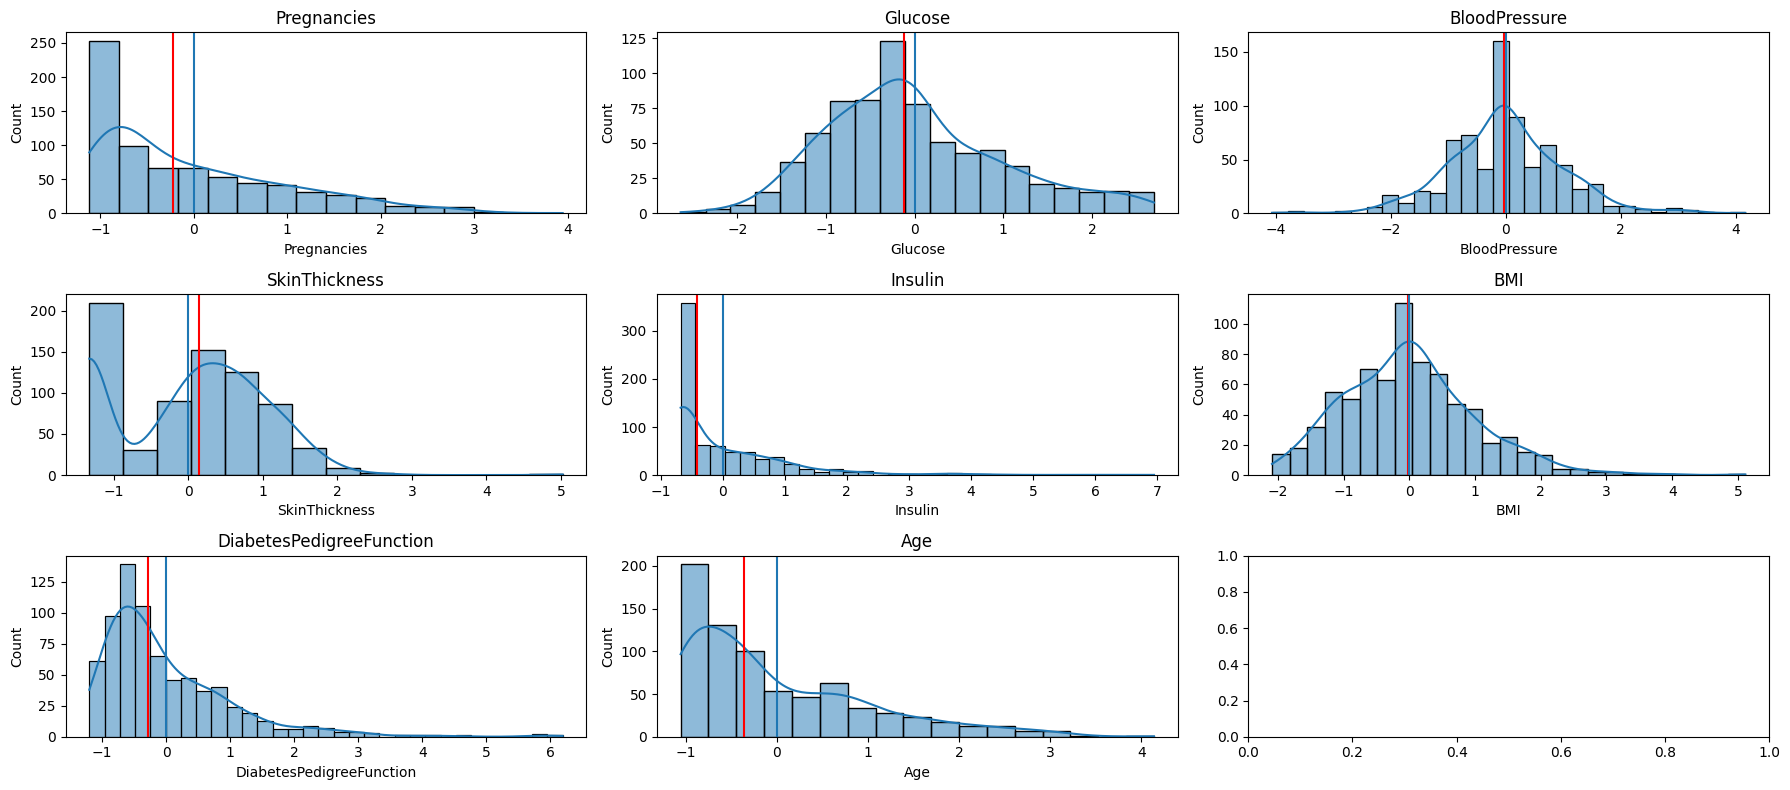

In [118]:
#StandardScaler
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)):
    sns.histplot(data=ss_transformed_df,x=cols[i],kde=True,ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
    mean_v=ss_transformed_df[cols[i]].mean()
    median_v=ss_transformed_df[cols[i]].median()
    ax.flatten()[i].axvline(median_v,color='red')
    ax.flatten()[i].axvline(mean_v)

plt.tight_layout()

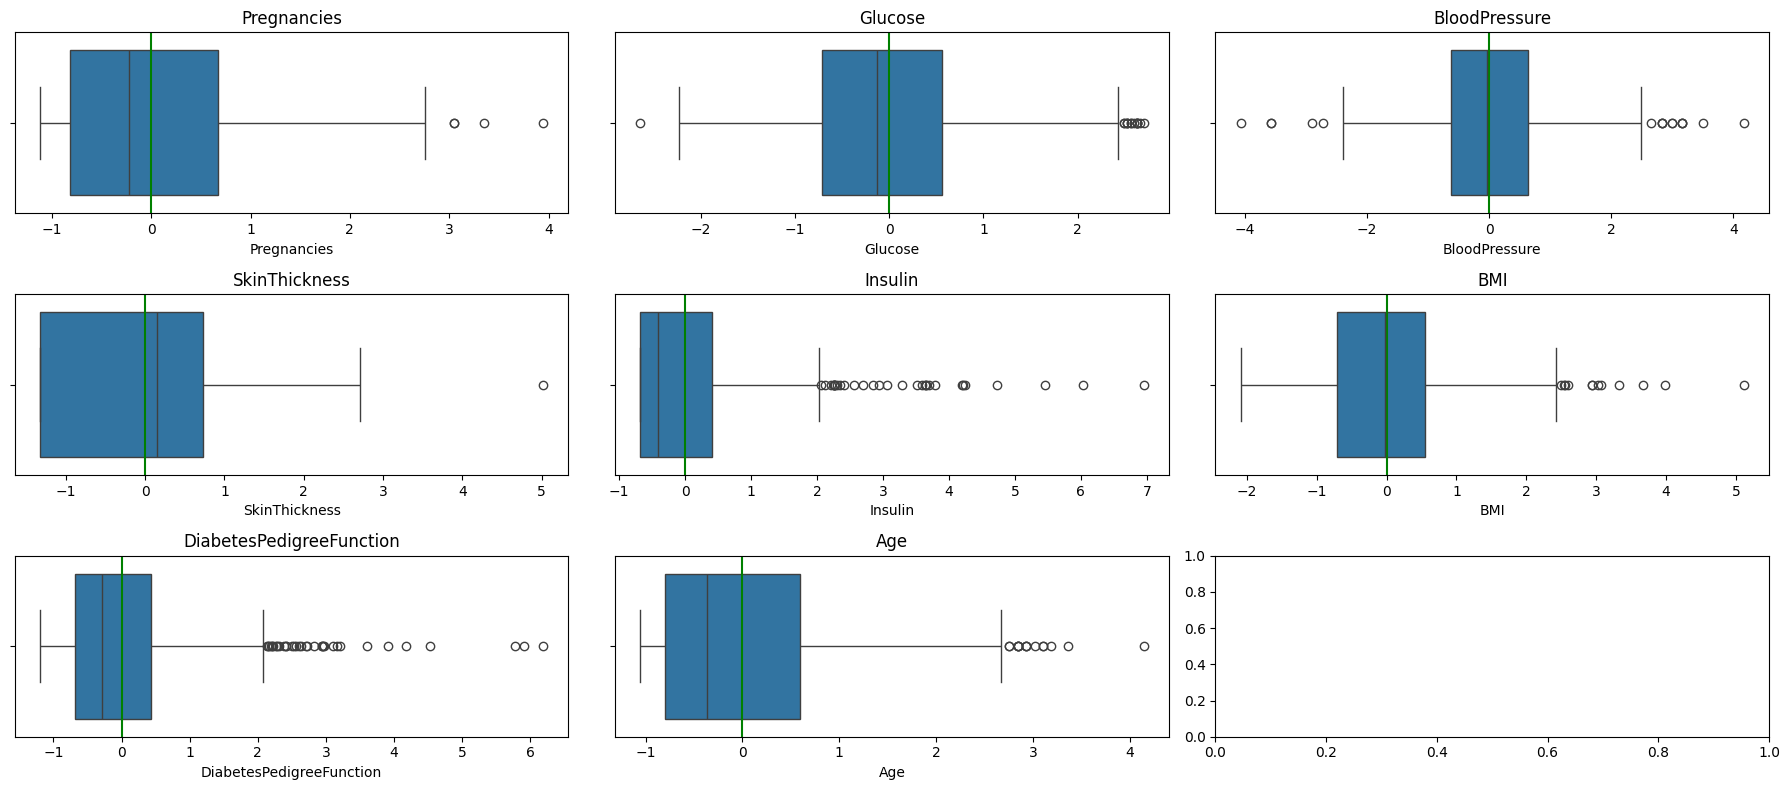

In [119]:
#StandardScaler
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)):
    sns.boxplot(data=ss_transformed_df,x=cols[i],ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
    mean_v=ss_transformed_df[cols[i]].mean()
    ax.flatten()[i].axvline(mean_v,color='green')
plt.tight_layout()

In [120]:
cols=mms_transformed_df.columns

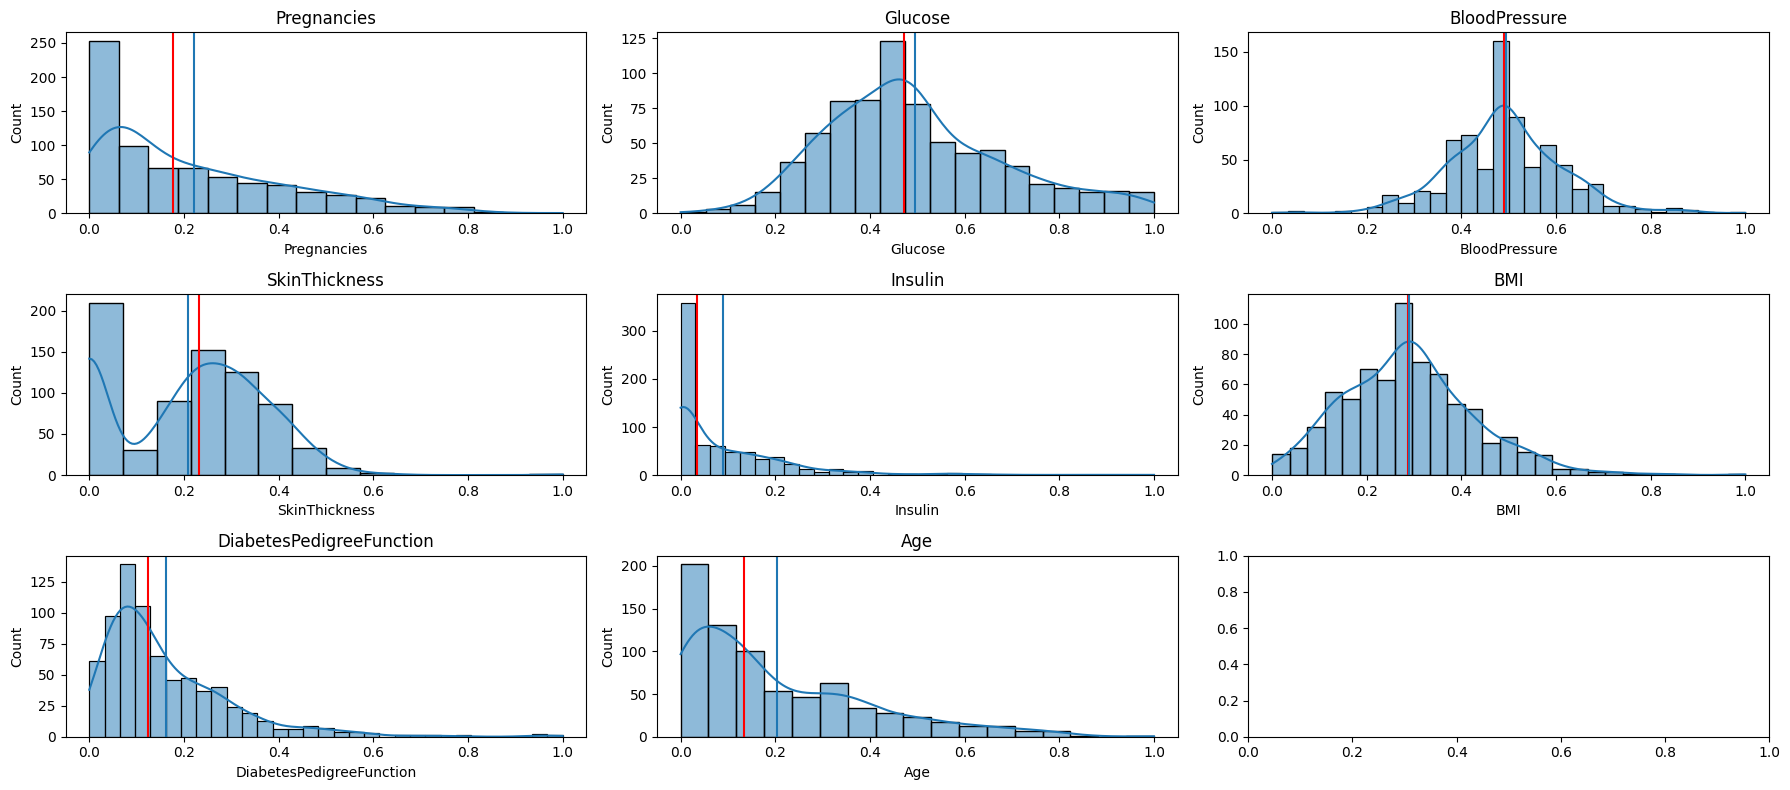

In [116]:
#Distribution for MMinMaxScaler
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)):
    sns.histplot(data=mms_transformed_df,x=cols[i],kde=True,ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
    mean_v=mms_transformed_df[cols[i]].mean()
    median_v=mms_transformed_df[cols[i]].median()
    ax.flatten()[i].axvline(median_v,color='red')
    ax.flatten()[i].axvline(mean_v)

plt.tight_layout()

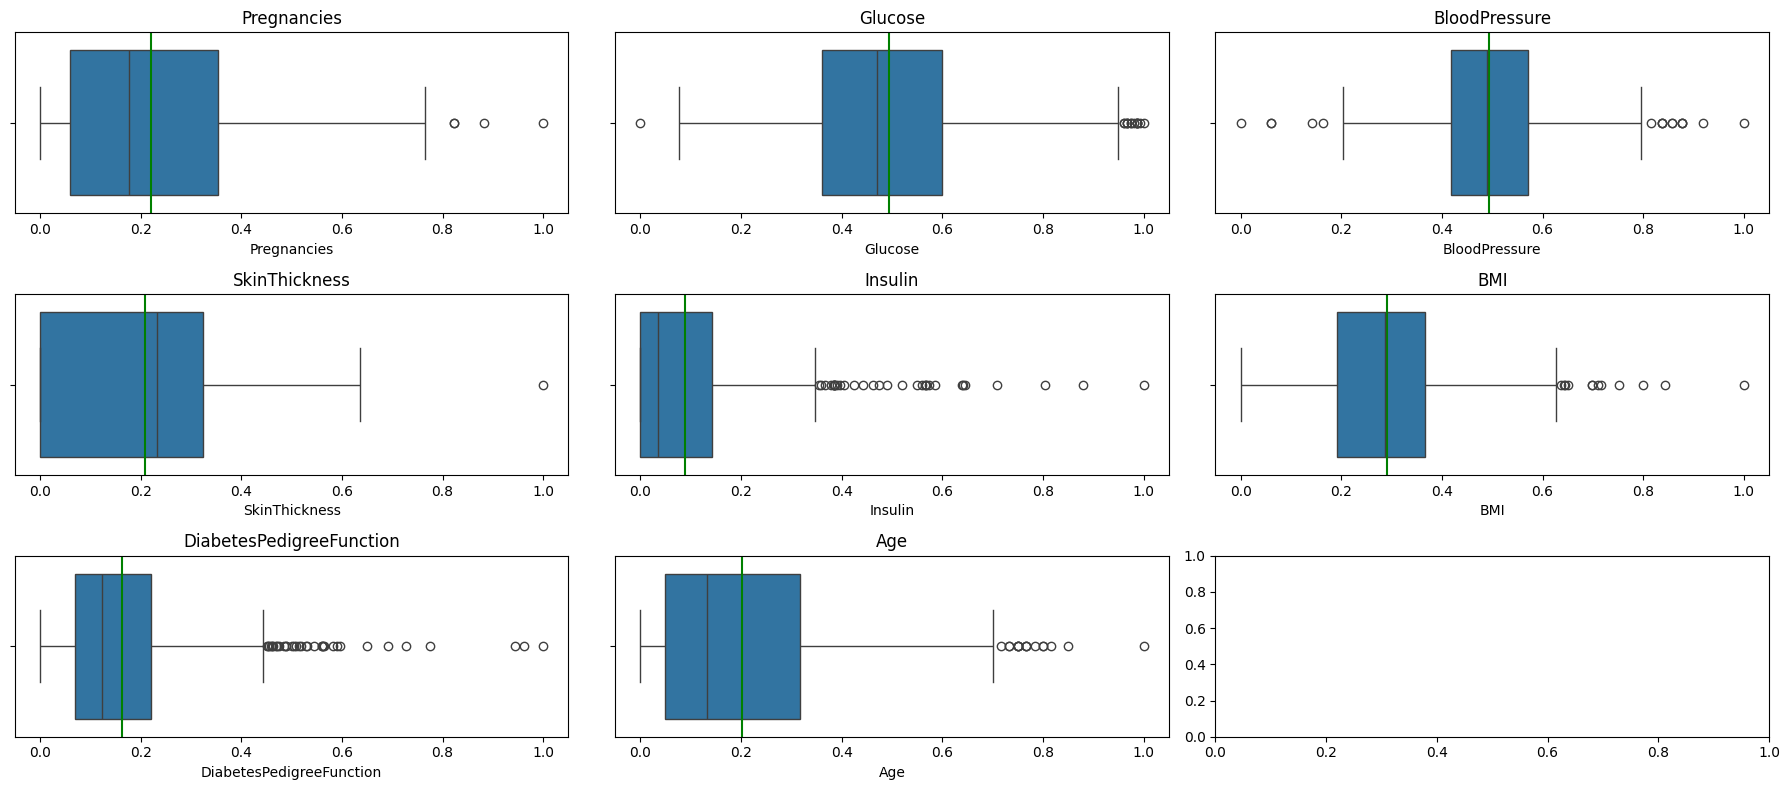

In [121]:
#MMinMaxScaler
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)):
    sns.boxplot(data=mms_transformed_df,x=cols[i],ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
    mean_v=mms_transformed_df[cols[i]].mean()
    ax.flatten()[i].axvline(mean_v,color='green')
plt.tight_layout()

In [122]:
cols=rbs_transformed_df.columns

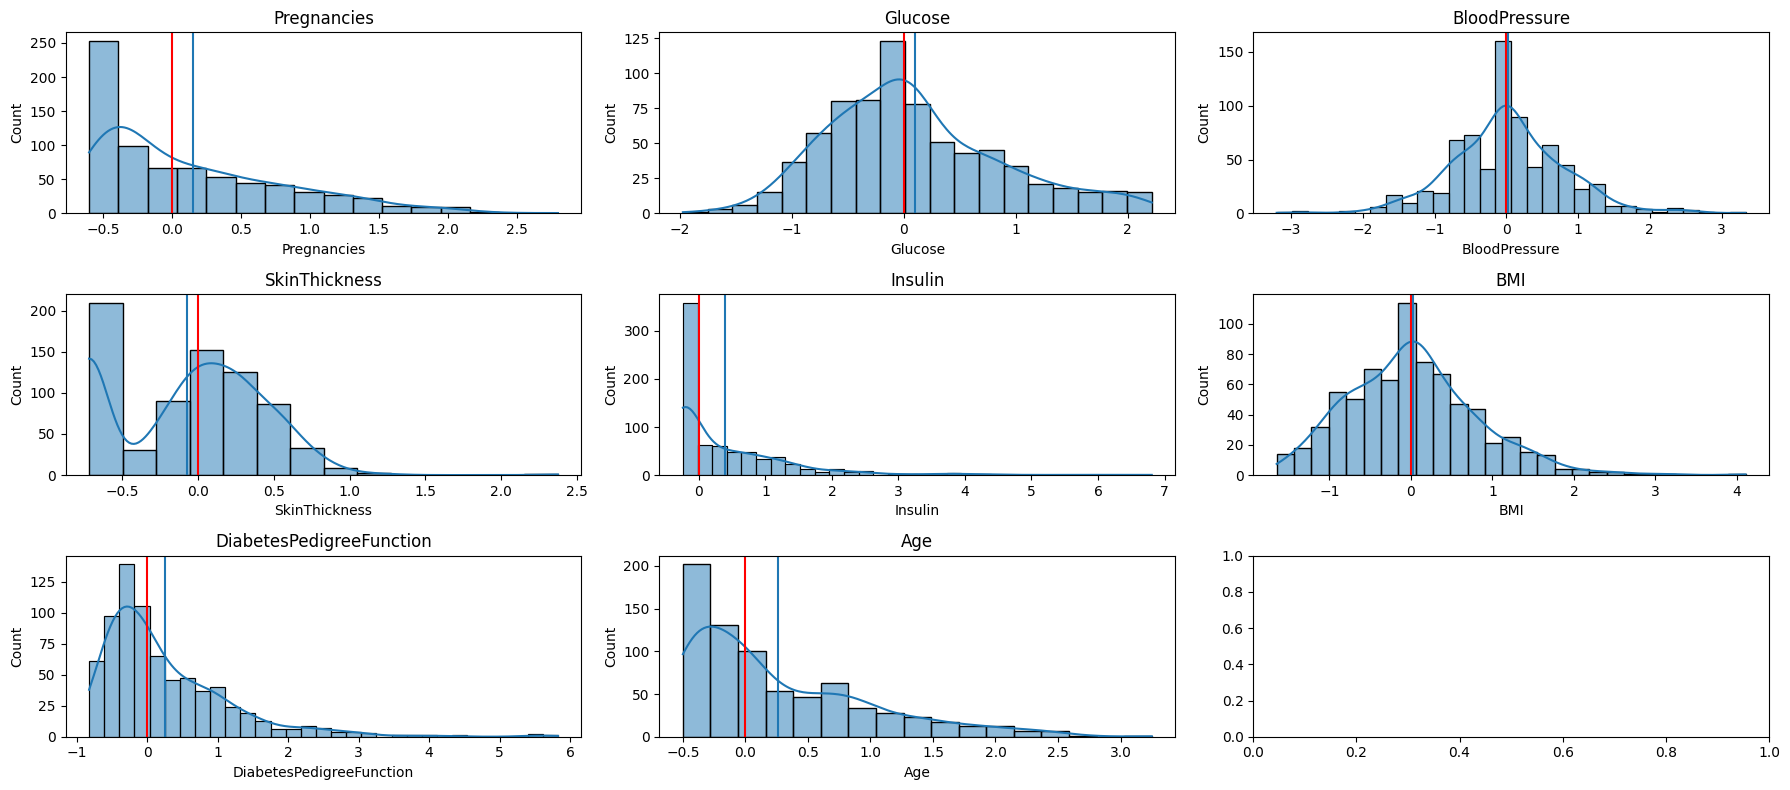

In [123]:
#Distribution for RobustScaler
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)):
    sns.histplot(data=rbs_transformed_df,x=cols[i],kde=True,ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
    mean_v=rbs_transformed_df[cols[i]].mean()
    median_v=rbs_transformed_df[cols[i]].median()
    ax.flatten()[i].axvline(median_v,color='red')
    ax.flatten()[i].axvline(mean_v)

plt.tight_layout()

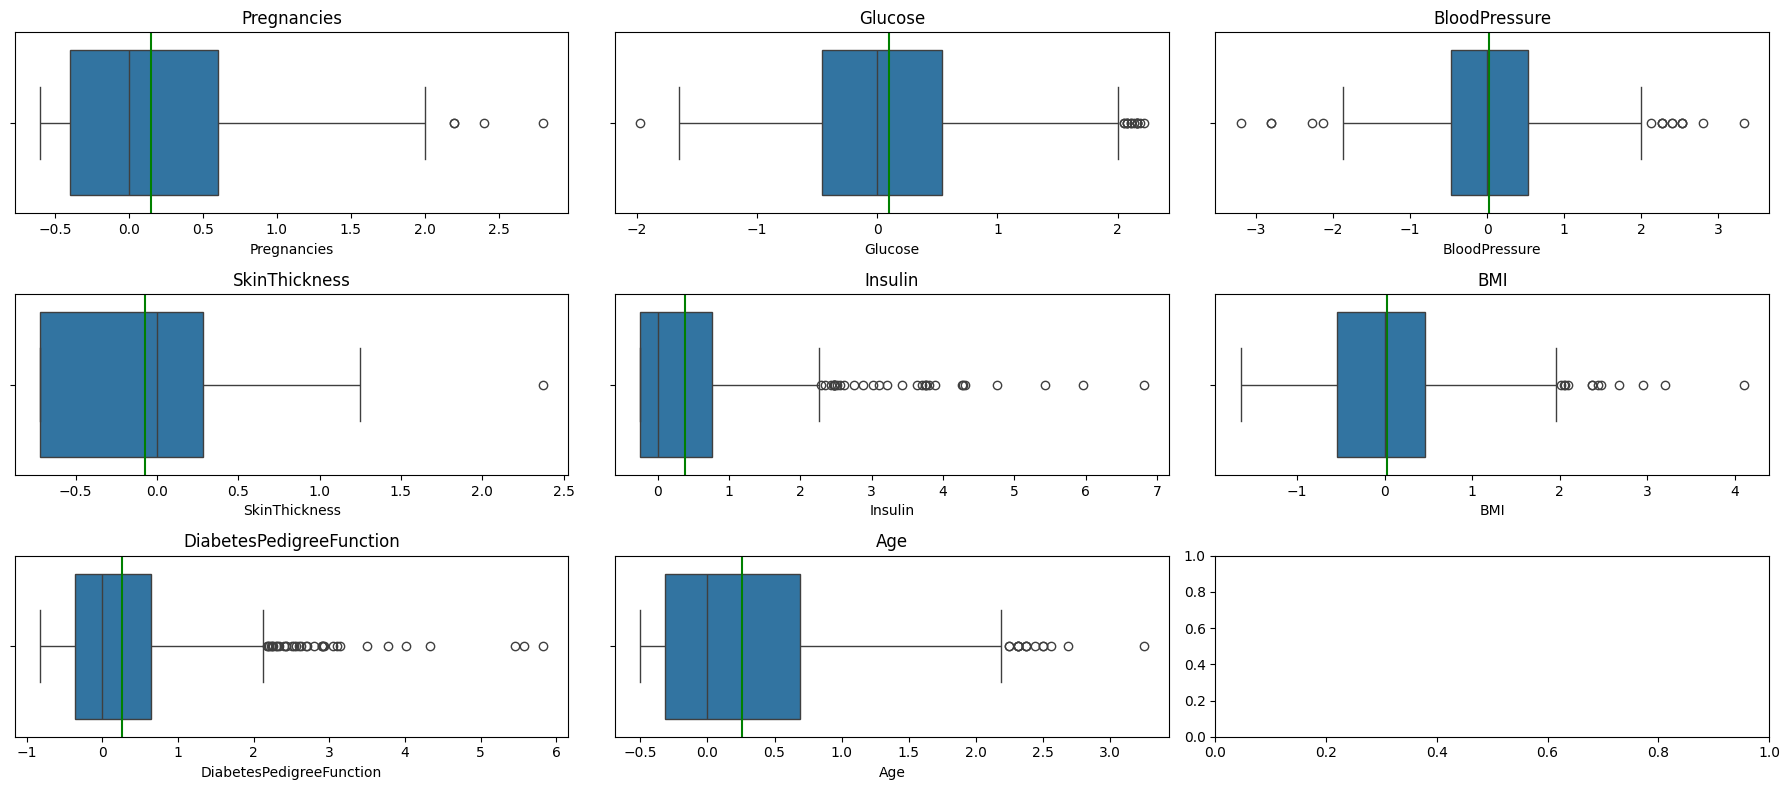

In [124]:
#RobustScaler
fig,ax=plt.subplots(3,3,figsize=(18,8))

for i in range(0,len(cols)):
    sns.boxplot(data=rbs_transformed_df,x=cols[i],ax=ax.flatten()[i])
    ax.flatten()[i].set_title(f'{cols[i]}')
    mean_v=rbs_transformed_df[cols[i]].mean()
    ax.flatten()[i].axvline(mean_v,color='green')
plt.tight_layout()

- **Observations:**
  - Scaling changes the scale and spread of the data but does NOT change the underlying shape of the distribution.
  - Peaks, skewness, and overall patterns stay the same.
  - Only the axes (range, variance, units) are transformed.
  - A right-skewed distribution remains right-skewed.
  - RobustScaler is the best for datasets with outliers.
  - It uses median and IQR (Interquartile Range) instead of mean and standard deviation.
  - After applying Robust scaler Most of the data becomes well centered and compressed.
  - MinMaxScaler Transforms all features into a fixed range (commonly 0 to 1).
  - After Standard scaling Mean becomes zero.


## PART 6: Saving the Final Outputs

In [128]:
ss_transformed_df.to_csv('diabetes_standard_scaled.csv',index=False)
mms_transformed_df.to_csv('diabetes_minmax_scaled.csv',index=False)
rbs_transformed_df.to_csv('diabetes_robust_scaled.csv',index=False)

In [129]:
df=pd.read_csv(r'diabetes_standard_scaled.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.668949,0.942502,-0.031501,0.917745,-0.678770,0.179607,0.535069,1.456323
1,-0.820964,-1.226986,-0.535737,0.533015,-0.678770,-0.026518,-0.335690,-0.188086
2,1.264914,2.147774,-0.703816,-1.326508,-0.678770,-1.336885,0.677040,-0.101539
3,-0.820964,-1.089241,-0.535737,0.148286,0.168896,-0.630170,-0.916195,-1.053565
4,-1.118947,0.563703,-2.720764,0.917745,0.836208,1.578314,5.775395,-0.014991
